In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pylab
import scipy as sp

plt.rc('font', family='serif')
plt.rc('text', usetex=False)
plt.rc('axes', axisbelow=True)
label_size = 20
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['axes.labelsize'] = label_size
mpl.rcParams['axes.titlesize'] = label_size
mpl.rcParams['figure.titlesize'] = label_size
mpl.rcParams['lines.markersize'] = label_size
mpl.rcParams['grid.linewidth'] = 2.5
mpl.rcParams['legend.fontsize'] = label_size
pylab.rcParams['xtick.major.pad']=5
pylab.rcParams['ytick.major.pad']=5

lss = ['--',  ':', '-.', '-', '--', '-.', ':', '-', '--', '-.', ':', '-']
mss = ['>', 'o',  's', 'D', '>', 's', 'o', 'D', '>', 's', 'o', 'D']


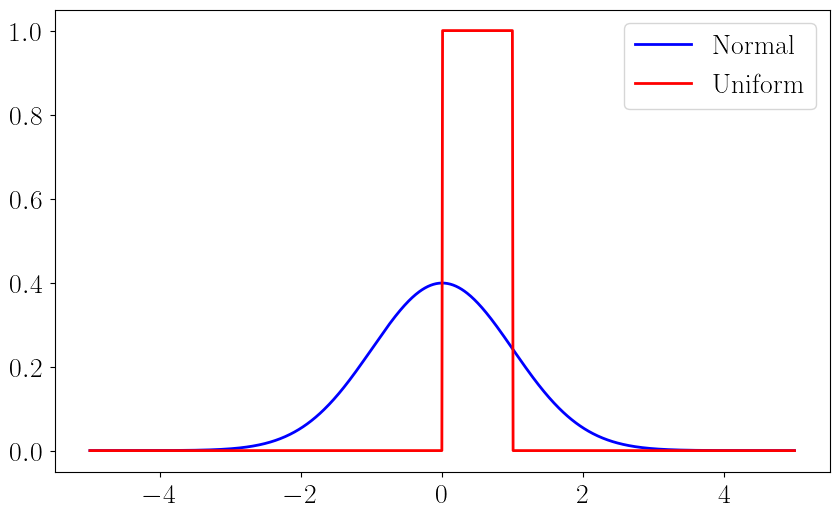

In [4]:
dist1 = sp.stats.norm(loc = 0, scale = 1)
dist2 = sp.stats.uniform(loc = 0, scale = 1)

x = np.linspace(-5, 5, 1000)
y1 = dist1.pdf(x)
y2 = dist2.pdf(x)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(x, y1, lw=2, label='Normal', color='blue')
ax.plot(x, y2, lw=2, label='Uniform', color='red')
ax.legend()

plt.show()